In [3]:
from ccf.core.cross_correlation_functions import WavelengthBin, NormalizedCCF
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.models import Lorentz1D
from scipy.signal import find_peaks
from ccf.constants import c_in_kms

### Step 1: Generate some simulated data based on some line profile model.

#### Setup the centre, FWHM, and amplitude of the model; shift and noise of the simulated data

In [4]:
nbins = 5000 # Number of bins
wave_centre = 6564.6 # The centre of the line feature
window = 200 
rv_true = -200 # The true RV value in km/s
shift = (rv_true / c_in_kms) * wave_centre # Shift in wavelength units

line_profile = Lorentz1D(x_0=wave_centre, fwhm=5, amplitude=1.0)
line_profile_shifted = Lorentz1D(x_0=wave_centre + shift, fwhm=5, amplitude=1.0)
noise = np.random.randn(nbins + 1) * 0.1


#### Wavelength bins are host in a WavelengthBin object

In [5]:
# Instantiate a WavelengthBin object
wave_bin_test = WavelengthBin(wave_centre - 0.5 * window, 
                              wave_centre + 0.5 * window, nbins)

#### Then generate the simulated data

In [6]:
data_tem = line_profile(wave_bin_test.linear_grid)
data_obs = line_profile_shifted(wave_bin_test.linear_grid) + noise

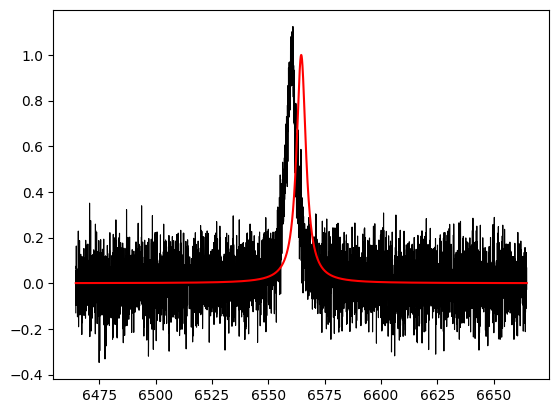

In [7]:
plt.plot(wave_bin_test.linear_grid, data_obs, color="k", lw=0.8)
plt.plot(wave_bin_test.linear_grid, data_tem, color="r", lw=1.5)

### Step 2: Instantiate a NormalizedCCF object.

In [8]:
ccf_test = NormalizedCCF(data_obs=data_obs, data_temp=data_tem, 
                         bins=wave_bin_test)

#### Simply use .rv and .rv_err to get the RV and the uncertainty

In [9]:
print(f"{ccf_test.rv:.2f} +/- {ccf_test.rv_err:.2f} km/s")

-202.78 +/- 0.92 km/s


### To plot the cross-correlation functions and the peak locations

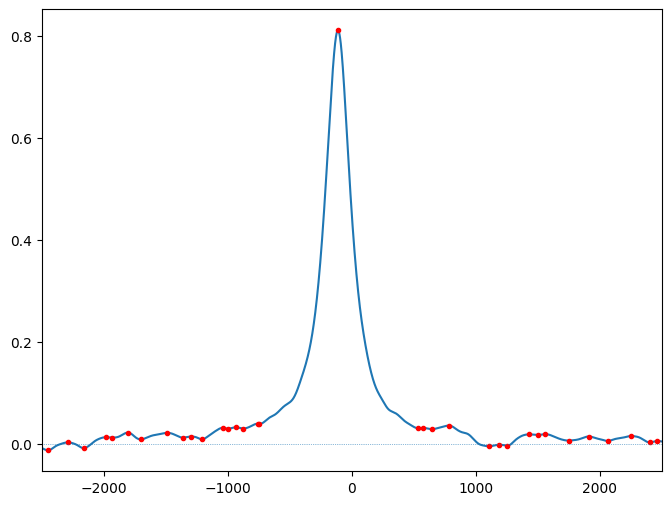

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
peaks = ccf_test.ccf_peaks(min_height=1e-3)

ax.plot(ccf_test.lags, ccf_test.ccf())
ax.plot(ccf_test.lags[peaks[0]], ccf_test.ccf()[peaks[0]], "ro", ms=3)

ax.set_xlim(-2500, 2500)
# ax.set_ylim(-0.1, 0.1)

ax.axhline(0, ls=":", lw=0.5)
